<a href="https://colab.research.google.com/github/Susmitasharma-1/AI-final-assignment/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ENVIRONMENT SETUP & DATA LOADING

In [ ]:

# PART 1: IMPORT LIBRARIES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


Load Dataset

In [ ]:

# LOAD DATASET

df = pd.read_csv("/content/drive/MyDrive/concepts of AI/Classification_converted.csv")
df.head()


,country,Crime_Index,Criminality_Score,Market_Score,Actor_Score,Resilience,Safety_Index,Safety_category
0,India,44.4,5.75,6.70,4.8,5.42,55.6,0
1,China,60.8,6.37,6.53,6.2,5.67,39.2,0
2,United States,49.2,5.67,5.83,5.5,7.13,50.8,0
3,Indonesia,45.9,6.85,6.60,7.1,4.25,54.1,0
4,Pakistan,42.8,6.03,6.27,5.8,3.96,57.2,0


Basic Dataset Check

In [ ]:
df.shape


(198, 8)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            198 non-null    object 
 1   Crime_Index        141 non-null    float64
 2   Criminality_Score  192 non-null    float64
 3   Market_Score       192 non-null    float64
 4   Actor_Score        192 non-null    float64
 5   Resilience         192 non-null    float64
 6   Safety_Index       140 non-null    float64
 7   Safety_category    198 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 12.5+ KB


In [ ]:
df.columns


Index(['country', 'Crime_Index', 'Criminality_Score', 'Market_Score',
       'Actor_Score', 'Resilience', 'Safety_Index', 'Safety_category'],
      dtype='object')

DATA UNDERSTANDING & QUALITY CHECK

In [ ]:
df.describe()


,Crime_Index,Criminality_Score,Market_Score,Actor_Score,Resilience,Safety_Index,Safety_category
count,141.000000,192.000000,192.000000,192.000000,192.000000,140.000000,198.000000
mean,45.768774,5.030990,4.876823,5.184896,4.827031,54.237143,0.247475
std,15.200526,1.343112,1.313314,1.498037,1.635440,15.254943,0.432639
min,14.300000,1.620000,1.670000,1.300000,1.500000,17.900000,0.000000
25%,32.800000,4.225000,3.970000,4.275000,3.750000,43.900000,0.000000
50%,46.500000,4.960000,4.900000,5.150000,4.880000,53.500000,0.000000
75%,55.900000,5.982500,5.785000,6.100000,5.680000,67.250000,0.000000
max,82.100000,8.150000,8.130000,8.600000,8.630000,85.700000,1.000000


Missing Values Check

In [ ]:
df.isnull().sum()


,0
country,0
Crime_Index,57
Criminality_Score,6
Market_Score,6
Actor_Score,6
Resilience,6
Safety_Index,58
Safety_category,0


Target Variable Distribution (Class Balance)

In [ ]:
df["Safety_category"].value_counts()

,count
Safety_category,
0,149
1,49


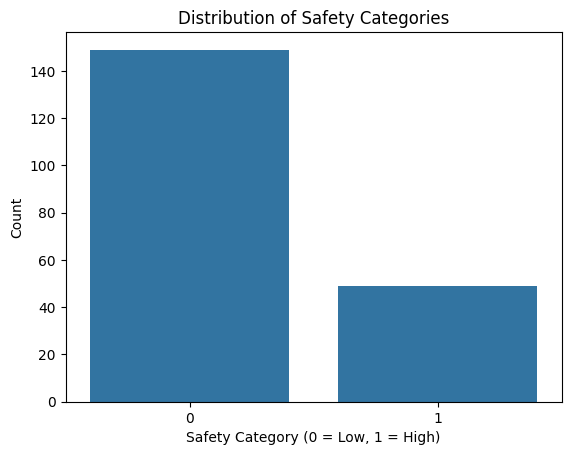

In [ ]:
sns.countplot(x="Safety_category", data=df)
plt.title("Distribution of Safety Categories")
plt.xlabel("Safety Category (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

FEATURE SELECTION & DATA PREPARATION

Select Features & Target

In [ ]:

# FEATURES & TARGET

X = df.drop(columns=["Safety_category", "country"]) # Drop 'country' column
y = df["Safety_category"]

Train–Test Split

In [ ]:

# TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Handle missing values after splitting to avoid data leakage
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

Feature Scaling

In [ ]:

# FEATURE SCALING

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


EXPLORATORY DATA ANALYSIS

Correlation Heatmap

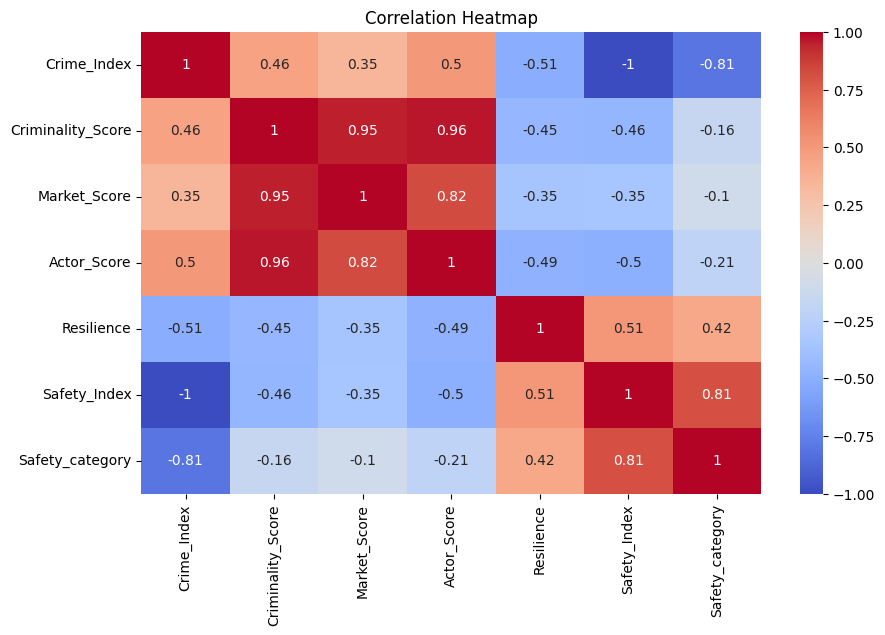

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Feature vs Target (Example)

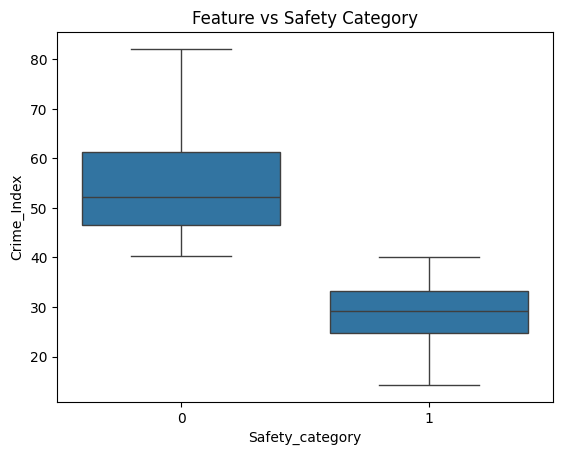

In [ ]:
sns.boxplot(x="Safety_category", y=X.columns[0], data=df)
plt.title("Feature vs Safety Category")
plt.show()

NEURAL NETWORK CLASSIFIER

In [ ]:

# PART 5: NEURAL NETWORK CLASSIFIER

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_mlp = mlp.predict(X_test_scaled)

mlp_acc = accuracy_score(y_test, y_pred_mlp)
mlp_prec = precision_score(y_test, y_pred_mlp)
mlp_rec = recall_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)

mlp_acc, mlp_prec, mlp_rec, mlp_f1


(1.0, 1.0, 1.0, 1.0)

TWO CLASSICAL CLASSIFICATION MODELS

Logistic Regression

In [ ]:

# LOGISTIC REGRESSION

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_acc = accuracy_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr)
lr_rec = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

lr_acc, lr_prec, lr_rec, lr_f1


(1.0, 1.0, 1.0, 1.0)

Decision Tree Classifier

In [ ]:

# DECISION TREE CLASSIFIER

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

dt_acc, dt_prec, dt_rec, dt_f1


(1.0, 1.0, 1.0, 1.0)

HYPERPARAMETER TUNING

Logistic Regression GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

param_lr = {
    "C": [0.01, 0.1, 1, 10]
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_lr,
    cv=5,
    scoring="f1"
)

grid_lr.fit(X_train_scaled, y_train)

grid_lr.best_params_, grid_lr.best_score_


({'C': 10}, np.float64(0.9714285714285715))

Decision Tree GridSearch

In [ ]:
param_dt = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_dt,
    cv=5,
    scoring="f1"
)

grid_dt.fit(X_train, y_train)

grid_dt.best_params_, grid_dt.best_score_


({'max_depth': None, 'min_samples_split': 2}, np.float64(0.9714285714285715))

FEATURE SELECTION

In [ ]:

# FEATURE SELECTION

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
0,Crime_Index,0.498975
5,Safety_Index,0.423612
4,Resilience,0.051715
1,Criminality_Score,0.010526
3,Actor_Score,0.010416
2,Market_Score,0.004756


Select Top Features

In [ ]:
selected_features = feature_importance_df["Feature"].head(5).tolist()
selected_features


['Crime_Index',
 'Safety_Index',
 'Resilience',
 'Criminality_Score',
 'Actor_Score']

FINAL MODELS WITH SELECTED FEATURES

In [ ]:

# FINAL MODELS

X_sel = df[selected_features]

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_sel, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Handle missing values for the selected features after splitting
X_train_sel = X_train_sel.fillna(X_train_sel.mean())
X_test_sel = X_test_sel.fillna(X_test_sel.mean())

final_lr = LogisticRegression(**grid_lr.best_params_, max_iter=1000)
final_lr.fit(X_train_sel, y_train_sel)

y_final_lr = final_lr.predict(X_test_sel)

final_lr_f1 = f1_score(y_test_sel, y_final_lr)
final_lr_f1

1.0

FINAL COMPARISON TABLE

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Neural Network"],
    "Accuracy": [lr_acc, dt_acc, mlp_acc],
    "Precision": [lr_prec, dt_prec, mlp_prec],
    "Recall": [lr_rec, dt_rec, mlp_rec],
    "F1 Score": [lr_f1, dt_f1, mlp_f1]
})

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0,1.0
2,Neural Network,1.0,1.0,1.0,1.0
